In [17]:
import random
import numpy as np
from micrograd.engine import Value
from graphviz import Digraph
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [12]:
def trace(root):
    nodes, edges = [], []
    def build(value):
        if value not in nodes:
            nodes.append(value)
            for child in value._prev:
                edges.append((child, value))
                build(child)            
    build(root)
    return nodes, edges

def draw_dot(root, format="svg", rankdir="LR"):
    # format: svg and png
    # rankdir: LR, TB, RL, BT
    nodes, edges = trace(root)
    dot = Digraph(comment="Computational Graphs", format=format, graph_attr={"rankdir": rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label=f"{n.label} | data {n.data:.4f} | grad {n.grad:.4f}", shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot


# Plot 3D 

In [25]:
def func(x, y):
    return x*np.exp(-(x**2+y**2))

In [27]:
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)

x, y = np.meshgrid(x, y)

p = np.array(list(map(func, x, y)))

<IPython.core.display.Javascript object>


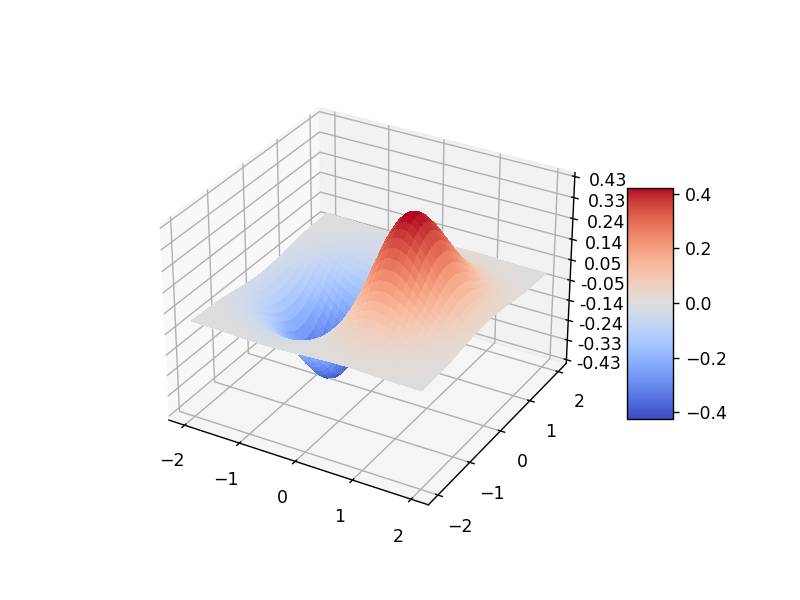

In [59]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x, y, p, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=1)
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Gradient ascent 

In [52]:
random.seed(42)
x1 = Value(random.uniform(-2, 2), label='x1')
x2 = Value(random.uniform(-2, 2), label='x2')

a = -1*(x1**2 + x2**2); a.label='a'
e = a.exp(); e.label='e'
f = x1*e; f.label='f'

f.backward()

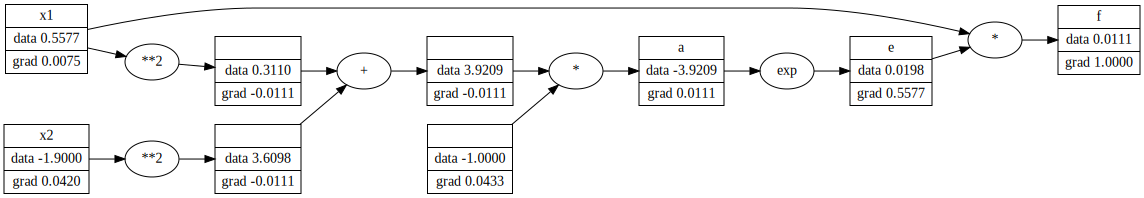

In [53]:
draw_dot(f)

In [54]:
lr = 0.05
fxy = []
xx = []
yy = []
epochs=300

for epoch in range(epochs):
    # recalcute function f every new x1 x2
    a = -1*(x1**2 + x2**2); a.label='a'
    e = a.exp(); e.label='e'
    f = x1*e; f.label='f'
    
    if epoch % 20 == 0:
        # store value of x1, x2 and function
        xx.append(x1.data)
        yy.append(x2.data)
        fxy.append(f.data)
        print(f"Epoch: {epoch} | f(x1, x2)={f.data:.4f}")
    
    # set zero gradient
    x1.grad = 0
    x2.grad = 0 
    
    # gradient backward
    f.backward()
    
    # update parameters
    x1.data += lr* x1.grad
    x2.data += lr* x2.grad

Epoch: 0 | f(x1, x2)=0.0111
Epoch: 20 | f(x1, x2)=0.0132
Epoch: 40 | f(x1, x2)=0.0161
Epoch: 60 | f(x1, x2)=0.0202
Epoch: 80 | f(x1, x2)=0.0265
Epoch: 100 | f(x1, x2)=0.0368
Epoch: 120 | f(x1, x2)=0.0553
Epoch: 140 | f(x1, x2)=0.0918
Epoch: 160 | f(x1, x2)=0.1683
Epoch: 180 | f(x1, x2)=0.2951
Epoch: 200 | f(x1, x2)=0.3917
Epoch: 220 | f(x1, x2)=0.4216
Epoch: 240 | f(x1, x2)=0.4276
Epoch: 260 | f(x1, x2)=0.4287
Epoch: 280 | f(x1, x2)=0.4288


<IPython.core.display.Javascript object>


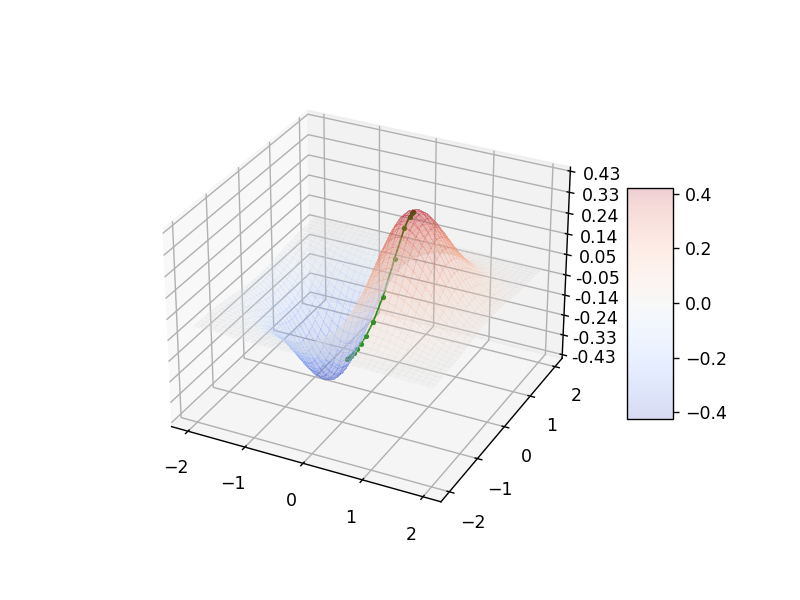

In [61]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x, y, p, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)

#ax.set_zlim(-1.01, 1.01)
xx = np.array(xx)
yy = np.array(yy)
#a_x, b_x= np.meshgrid(a_x, b_x)
fxy = np.array(list(map(func, xx, yy)))
#ax.scatter(xx, yy, fxy, color='red', linewidth=0.1, zorder=-1)
ax.plot(xx, yy, fxy, color='green', linewidth=1, zorder=-1, marker='o', markersize=2)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()